## Setup

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_result { max-width:90% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore")

import numpy as np
np.set_printoptions(precision=3)
np.set_printoptions(linewidth=170)
np.set_printoptions(suppress=True)
np.random.seed(8)

import matplotlib.pyplot as plt
%matplotlib inline

from time import time, sleep
sleep(0.2)

C:\Users\raziel lab\AppData\Local\Temp\ipykernel_16316\4262382925.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Imports & Parameters

In [2]:
import pandas as pd
import seaborn as sns

sns.set(style="darkgrid")
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
random_state = 8

## Loading the data

In [3]:
direct_consumption_df = pd.read_csv('C:/Users/raziel lab/PycharmProjects/ConsumptionModels/Models/Data Preprocessing/direct_consumption_df.csv')
direct_consumption_df.drop(direct_consumption_df.filter(regex='20').columns, axis=1, inplace=True)
direct_consumption_df.head()

,building_number,January-19,February-19,March-19,April-19,May-19,June-19,July-19,August-19,September-19,October-19,November-19,December-19
0,Building 14,32322.67,20597.35,19120.75,12793.32,15889.49,19220.65,21234.02,15783.52,16713.58,13395.52,15324.38,18731.01
1,Building 15-16,80986.07,68354.88,79253.44,71262.98,78553.85,80835.15,78680.25,74845.36,74679.36,72665.16,75472.21,84106.24
2,Building 17,17116.72,13160.29,14924.58,12083.06,10763.36,9963.47,10674.28,9750.88,10825.56,9763.25,10313.20,14048.81
3,Building 18,34066.53,25909.36,19466.09,15055.70,17135.52,17391.83,18756.38,18569.44,16230.71,16298.52,16068.00,20430.97
4,Building 22,96588.84,86662.73,88725.18,74535.23,97250.64,100709.34,106762.79,77097.23,88570.44,93544.00,115000.00,97697.14


In [4]:
indirect_consumption_df = pd.read_csv('C:/Users/raziel lab/PycharmProjects/ConsumptionModels/Models/Data Preprocessing/indirect_consumption_df.csv')
indirect_consumption_df.drop(indirect_consumption_df.filter(regex='20').columns, axis=1, inplace=True)
indirect_consumption_df.head()

,building_number,January-19,February-19,March-19,April-19,May-19,June-19,July-19,August-19,September-19,October-19,November-19,December-19
0,Building 14,15.383570,9.038097,530.725715,401.938734,9995.987708,16245.695145,17115.967612,17517.754382,15841.395696,5030.039440,5394.157564,576.675786
1,Building 15-16,10439.197466,11153.307076,21448.094471,12477.416862,37633.788551,52243.404076,52727.331228,59835.230968,47330.192173,25206.562429,18107.362067,11614.366103
2,Building 17,89.126211,36.861258,1618.455926,1150.290424,4649.029532,6094.030262,7961.918841,7159.526443,8941.583993,2084.016041,1480.758301,123.159890
3,Building 18,2292.411169,1631.027983,2255.569283,3930.985004,8203.516174,13403.740136,14978.148924,15811.166337,11848.774279,7962.037259,4447.665483,2771.511933
4,Building 22,6928.762637,8614.582420,15711.349134,14100.583205,38769.964738,58714.033874,73362.230616,48608.052037,53645.578167,27310.936708,27913.686183,18757.005120


In [5]:
buildings_types_df = pd.read_csv('C:/Users/raziel lab/PycharmProjects/ConsumptionModels/Models/Data Preprocessing/buildings_types_df.csv')
buildings_types_df.head()

,building_number,type
0,Building 14,"Offices, Teaching Labs"
1,Building 15-16,"Offices, Teaching Labs"
2,Building 17,"Offices, Teaching Labs"
3,Building 18,"Offices, Teaching Labs"
4,Building 22,Others


In [6]:
buildings_details_df = pd.read_csv('C:/Users/raziel lab/PycharmProjects/ConsumptionModels/Models/Data Preprocessing/buildings_details_df.csv')
buildings_details_df.head()

,building_number,area_sm,est_year,floors,elevators
0,Building 14,2953,2016,5,1
1,Building 15-16,6343,2003,5,2
2,Building 17,1580,2006,3,0
3,Building 18,1792,2006,3,0
4,Building 22,10061,1971,5,3


In [7]:
labels_df = pd.read_csv('C:/Users/raziel lab/PycharmProjects/ConsumptionModels/Models/Data Preprocessing/labels_df.csv')
labels_df.head()

,building_number,label
0,Building 14,0
1,Building 15-16,0
2,Building 17,0
3,Building 18,0
4,Building 22,0


## Create Database

In [8]:
direct_consumption_df.insert(1, 'yearly_direct_consumption', direct_consumption_df.iloc[:,1:].sum(axis = 1))
direct_consumption_df.drop(direct_consumption_df.filter(regex='19').columns, axis=1, inplace=True)

In [9]:
indirect_consumption_df.insert(1, 'yearly_indirect_consumption', indirect_consumption_df.iloc[:,1:].sum(axis = 1))
indirect_consumption_df.drop(indirect_consumption_df.filter(regex='19').columns, axis=1, inplace=True)

In [10]:
buildings_details_df.drop(['est_year', 'floors', 'elevators'], axis=1, inplace=True)

In [11]:
direct_consumption_df['building_number'] = direct_consumption_df['building_number'].str.replace('Building ','')
indirect_consumption_df['building_number'] = indirect_consumption_df['building_number'].str.replace('Building ','')
buildings_types_df['building_number'] = buildings_types_df['building_number'].str.replace('Building ','')
buildings_details_df['building_number'] = buildings_details_df['building_number'].str.replace('Building ','')
labels_df['building_number'] = labels_df['building_number'].str.replace('Building ','')

In [12]:
buildings_yearly_consumption = pd.merge(buildings_types_df, labels_df, on='building_number')
buildings_yearly_consumption = pd.merge(buildings_yearly_consumption, buildings_details_df, on='building_number')
buildings_yearly_consumption = pd.merge(buildings_yearly_consumption, direct_consumption_df, on='building_number')
buildings_yearly_consumption = pd.merge(buildings_yearly_consumption, indirect_consumption_df, on='building_number')
buildings_yearly_consumption.head()

,building_number,type,label,area_sm,yearly_direct_consumption,yearly_indirect_consumption
0,14,"Offices, Teaching Labs",0,2953,221126.26,88674.759451
1,15-16,"Offices, Teaching Labs",0,6343,919694.95,360216.253471
2,17,"Offices, Teaching Labs",0,1580,143387.46,41388.757122
3,18,"Offices, Teaching Labs",0,1792,235379.05,89536.553965
4,22,Others,0,10061,1123143.56,392436.764838


In [13]:
buildings_yearly_consumption['yearly_total_consumption'] = buildings_yearly_consumption['yearly_direct_consumption']+buildings_yearly_consumption['yearly_indirect_consumption']
buildings_yearly_consumption['yearly_direct_consumption/area'] = buildings_yearly_consumption['yearly_direct_consumption']/buildings_yearly_consumption['area_sm']
buildings_yearly_consumption['yearly_indirect_consumption/area'] = buildings_yearly_consumption['yearly_indirect_consumption']/buildings_yearly_consumption['area_sm']
buildings_yearly_consumption['yearly_total_consumption/area'] = buildings_yearly_consumption['yearly_direct_consumption/area']+buildings_yearly_consumption['yearly_indirect_consumption/area']

In [14]:
buildings_yearly_consumption.head()

,building_number,type,label,area_sm,yearly_direct_consumption,yearly_indirect_consumption,yearly_total_consumption,yearly_direct_consumption/area,yearly_indirect_consumption/area,yearly_total_consumption/area
0,14,"Offices, Teaching Labs",0,2953,221126.26,88674.759451,3.098010e+05,74.881903,30.028703,104.910606
1,15-16,"Offices, Teaching Labs",0,6343,919694.95,360216.253471,1.279911e+06,144.993686,56.789572,201.783258
2,17,"Offices, Teaching Labs",0,1580,143387.46,41388.757122,1.847762e+05,90.751557,26.195416,116.946973
3,18,"Offices, Teaching Labs",0,1792,235379.05,89536.553965,3.249156e+05,131.349916,49.964595,181.314511
4,22,Others,0,10061,1123143.56,392436.764838,1.515580e+06,111.633392,39.005741,150.639134


## Consumption Graphs

In [15]:
buildings_yearly_consumption['area_sm'].mean()

3767.7021276595747

In [16]:
buildings_yearly_consumption['building_number'][buildings_yearly_consumption['building_number'] == 'Entrance Gate'] = 'Gate'

In [17]:
labels_palette ={'Administration':'tab:purple',
                 'Offices, Teaching Labs':'tab:orange',
                 'Classes':'tab:blue',
                 'Labs':'tab:green',
                 'Server Rooms':'tab:red',
                 'Others':'tab:brown'}

In [18]:
buildings_yearly_consumption = buildings_yearly_consumption.sort_values('yearly_total_consumption', ascending=False)

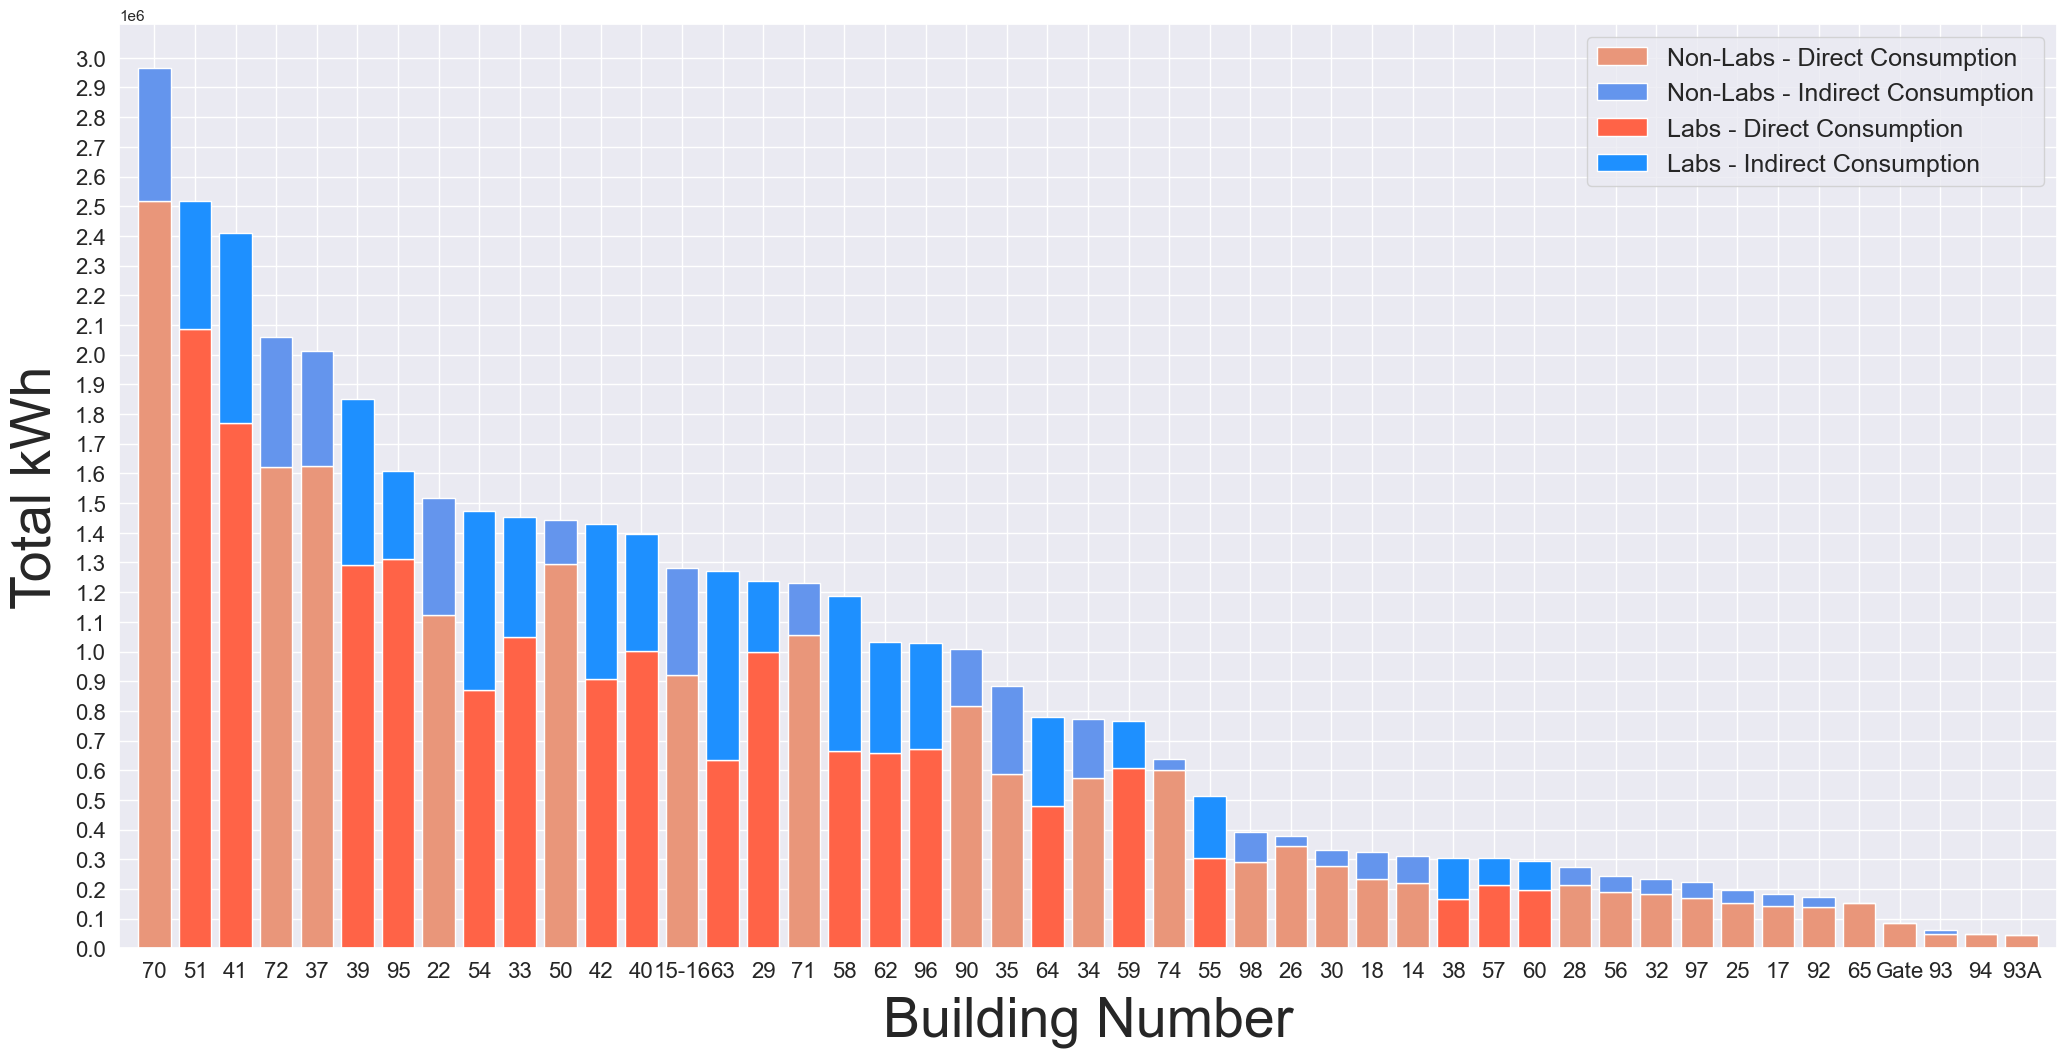

In [19]:
plt.figure(figsize=(25,12))

plt.xticks(fontsize=16)
plt.yticks(np.arange(0, 3100000, step=100000), fontsize=16)
plt.margins(x=0.01)

flag1 = False
flag2 = False

for index, row in buildings_yearly_consumption.iterrows():
    if row['label'] == 0:
        if flag1 == True:
            plt.bar(row['building_number'], row['yearly_direct_consumption'], color=['darksalmon'])
            plt.bar(row['building_number'], row['yearly_indirect_consumption'], bottom=row['yearly_direct_consumption'], color=['cornflowerblue'])
        else:
            plt.bar(row['building_number'], row['yearly_direct_consumption'], color=['darksalmon'], label='Non-Labs - Direct Consumption')
            plt.bar(row['building_number'], row['yearly_indirect_consumption'], bottom=row['yearly_direct_consumption'], color=['cornflowerblue'], label='Non-Labs - Indirect Consumption')
            flag1 = True
    else:
        if flag2 == True:
            plt.bar(row['building_number'], row['yearly_direct_consumption'], color=['tomato'])
            plt.bar(row['building_number'], row['yearly_indirect_consumption'], bottom=row['yearly_direct_consumption'], color=['dodgerblue'])
        else:
            plt.bar(row['building_number'], row['yearly_direct_consumption'], color=['tomato'], label='Labs - Direct Consumption')
            plt.bar(row['building_number'], row['yearly_indirect_consumption'], bottom=row['yearly_direct_consumption'], color=['dodgerblue'], label='Labs - Indirect Consumption')
            flag2 = True
    
plt.xlabel("Building Number", fontsize=40, labelpad=10)
plt.ylabel("Total kWh", fontsize=40, labelpad=10)

# graph_title = 'Yearly Total Consumption'
# plt.title(graph_title, fontsize=25, pad=10)

plt.legend(fontsize=18)

plt.savefig('Yearly Total Consumption.png')
plt.show()

In [20]:
buildings_yearly_consumption = buildings_yearly_consumption.sort_values('yearly_direct_consumption', ascending=False)

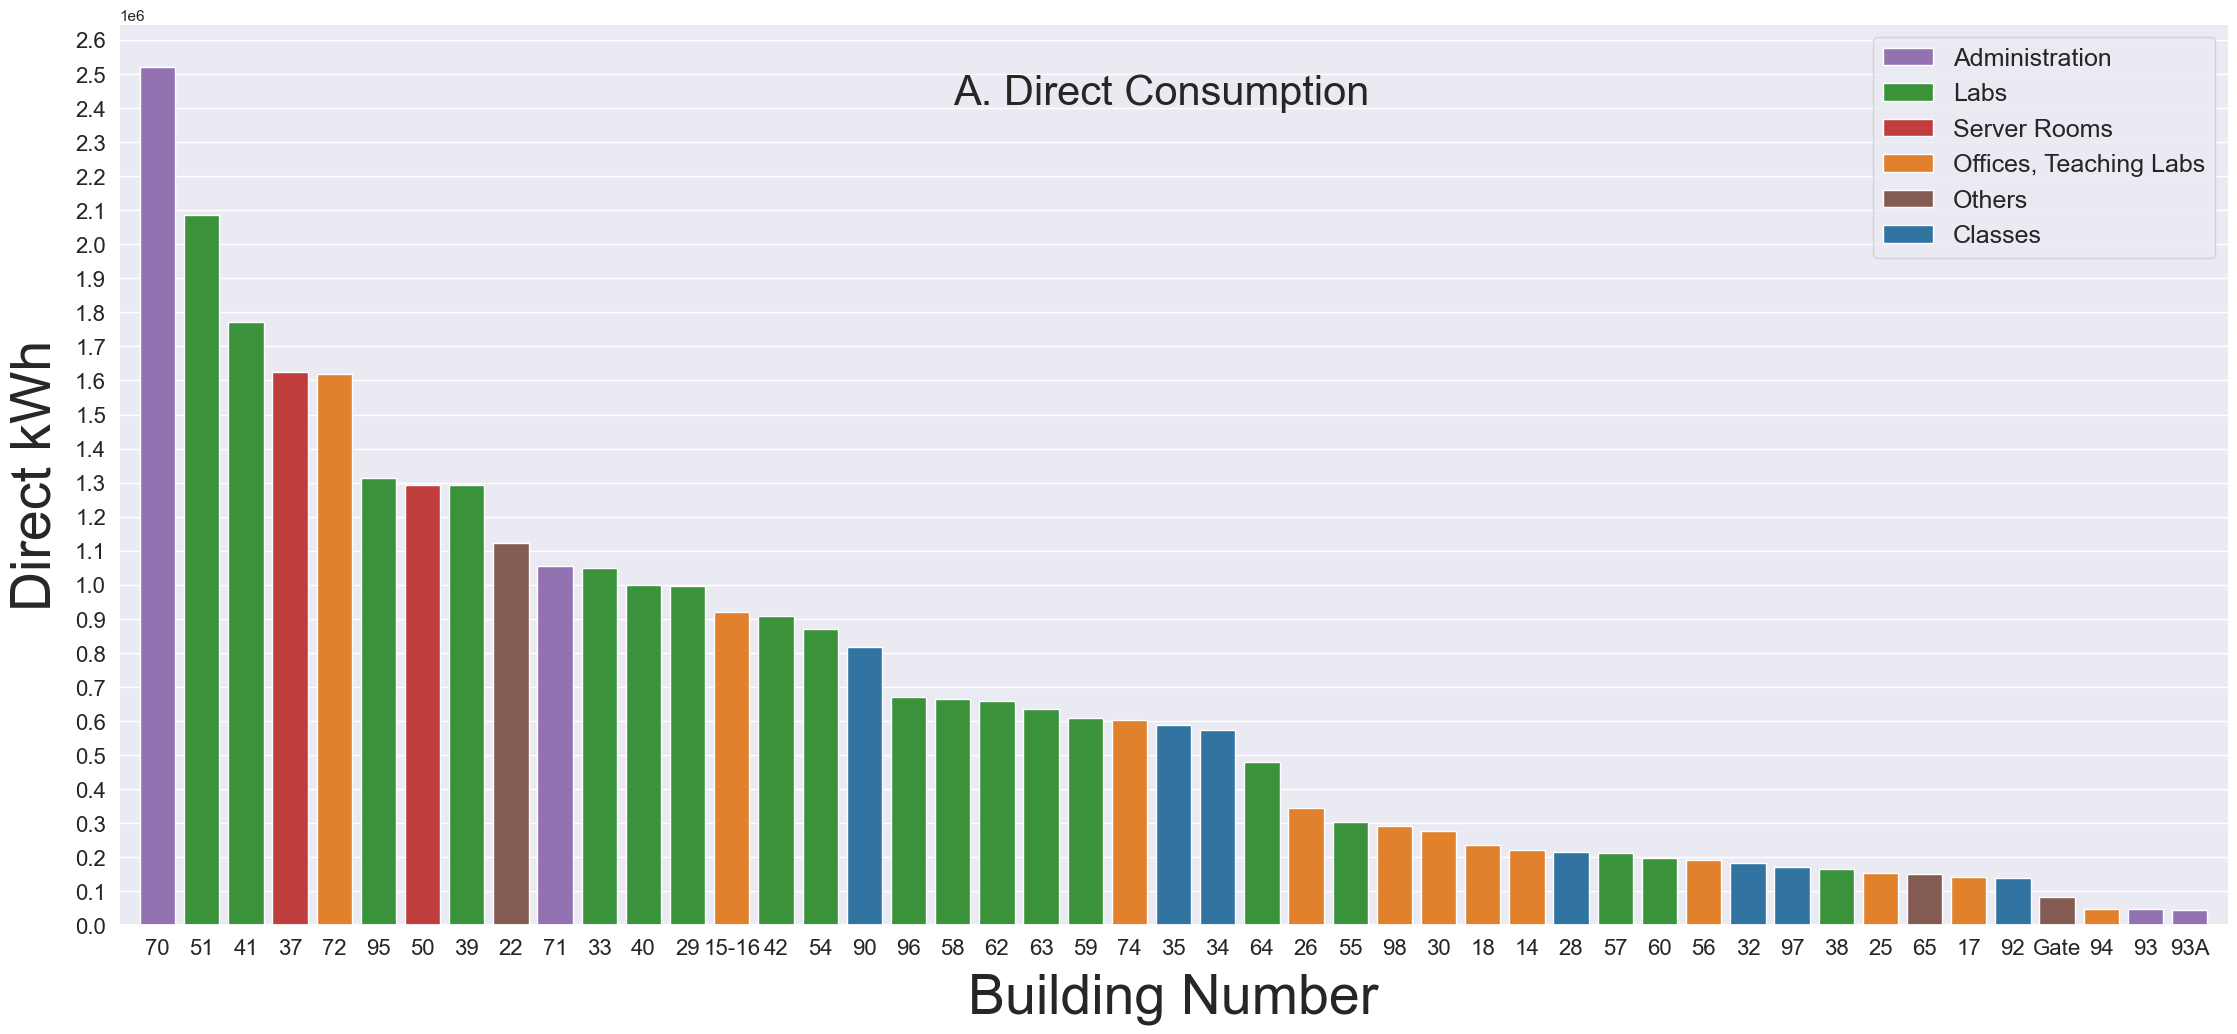

In [21]:
sns.catplot(data=buildings_yearly_consumption, x="building_number", y="yearly_direct_consumption", hue="type", kind="bar", height=10, aspect=2.2, legend_out=False, dodge=False, palette=labels_palette);

plt.xticks(fontsize=16)
plt.yticks(np.arange(0, 2700000, step=100000), fontsize=16)
plt.margins(x=0.01)

plt.xlabel("Building Number", fontsize=40, labelpad=10)
plt.ylabel("Direct kWh", fontsize=40, labelpad=10)

# graph_title = 'Yearly Direct Consumption'
# plt.title(graph_title, fontsize=25, pad=10)

plt.legend(loc='upper right', fontsize=18)
plt.text(18, 2410000, 'A. Direct Consumption', fontsize=30)

plt.savefig('Yearly Direct Consumption.png')
plt.show()

In [22]:
buildings_yearly_consumption = buildings_yearly_consumption.sort_values('yearly_indirect_consumption', ascending=False)

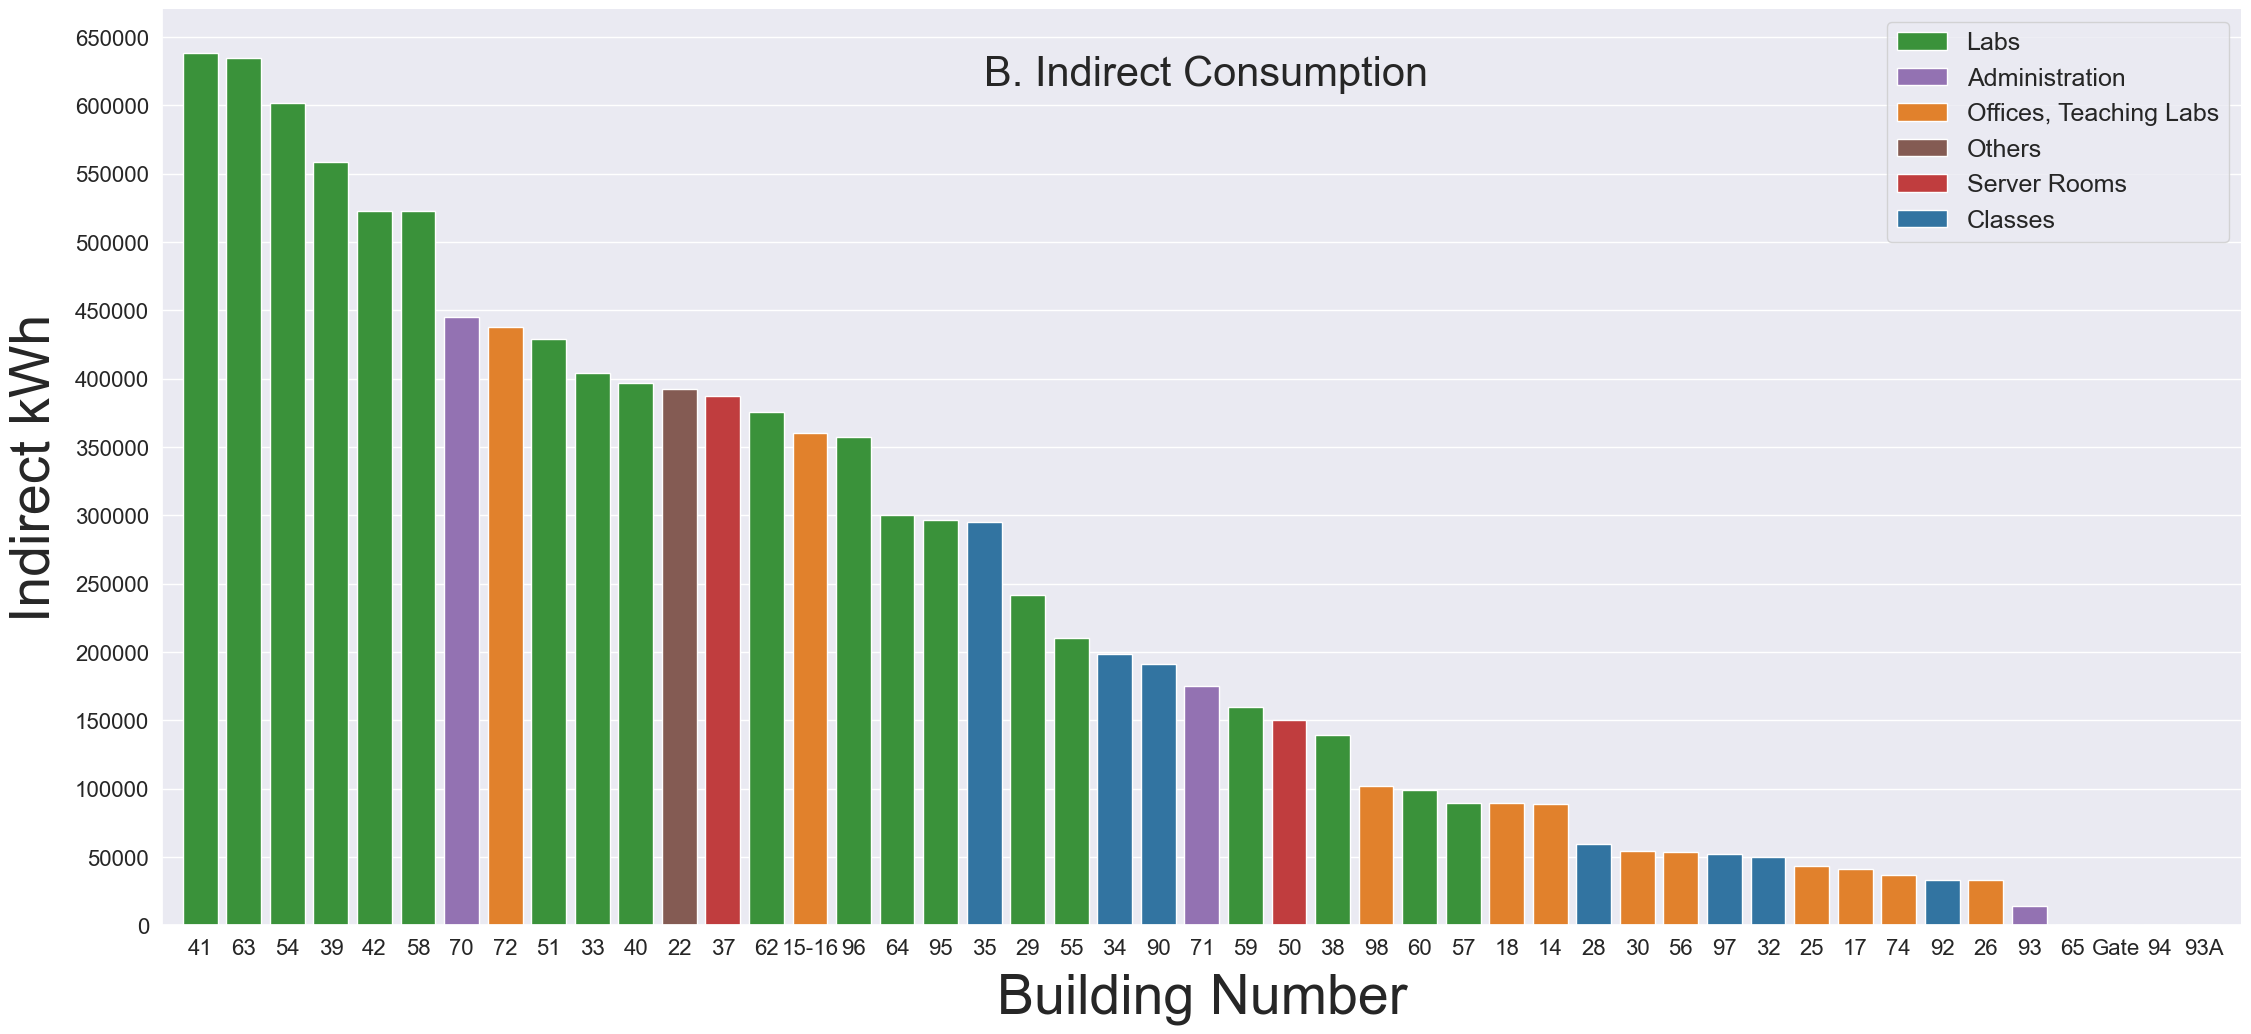

In [23]:
sns.catplot(data=buildings_yearly_consumption, x="building_number", y="yearly_indirect_consumption", hue="type", kind="bar", height=10, aspect=2.2, legend_out=False, dodge=False, palette=labels_palette);

plt.xticks(fontsize=16)
plt.yticks(np.arange(0, 700000, step=50000), fontsize=16)
plt.margins(x=0.01)

plt.xlabel("Building Number", fontsize=40, labelpad=10)
plt.ylabel("Indirect kWh", fontsize=40, labelpad=10)

# graph_title = 'Yearly Indirect Consumption'
# plt.title(graph_title, fontsize=25, pad=10)

plt.legend(loc='upper right', fontsize=18)
plt.text(18, 615000, 'B. Indirect Consumption', fontsize=30)

plt.savefig('Yearly Indirect Consumption.png')
plt.show()

In [24]:
buildings_yearly_consumption = buildings_yearly_consumption.sort_values('yearly_direct_consumption/area', ascending=False)

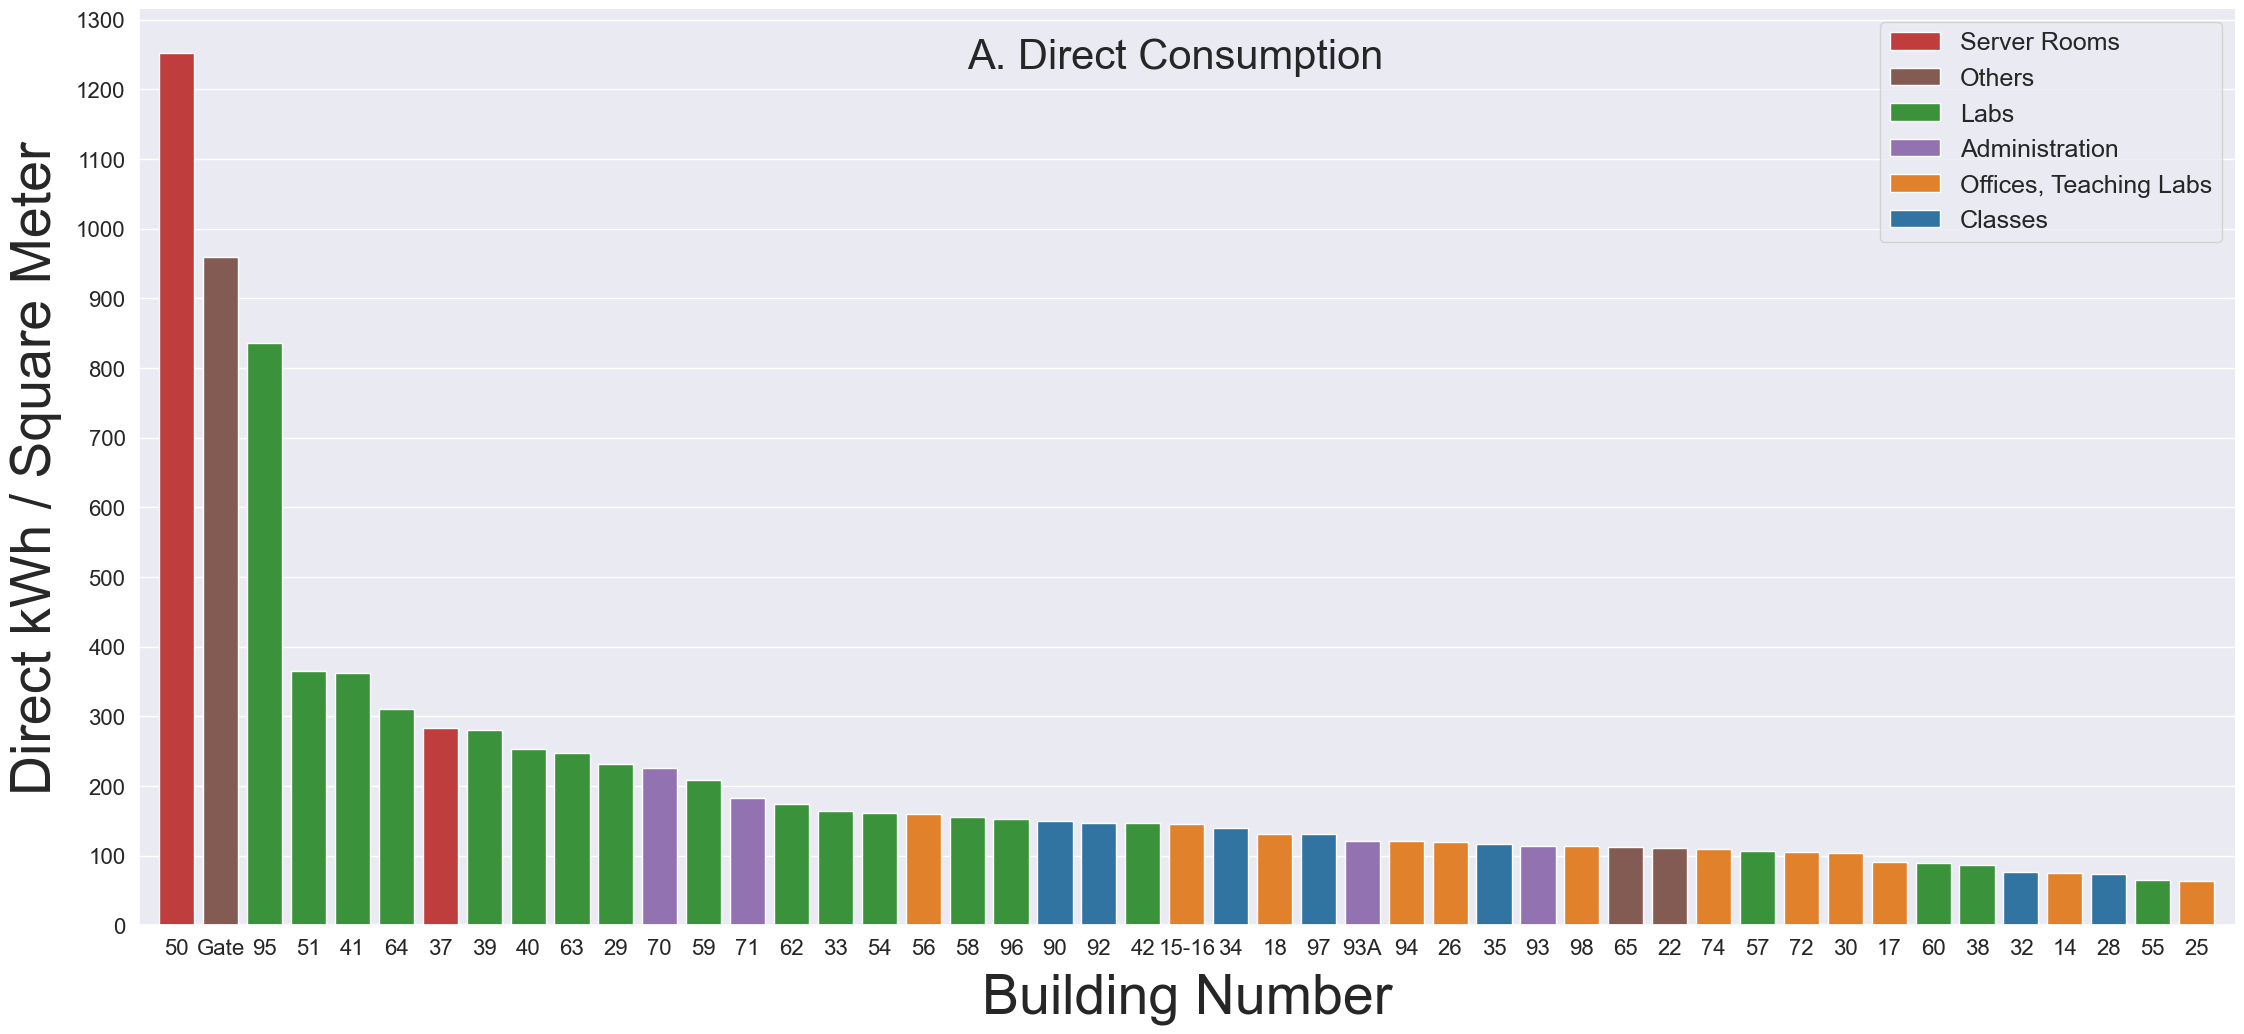

In [25]:
sns.catplot(data=buildings_yearly_consumption, x="building_number", y="yearly_direct_consumption/area", hue="type", kind="bar", height=10, aspect=2.2, legend_out=False, dodge=False, palette=labels_palette);

plt.xticks(fontsize=16)
plt.yticks(np.arange(0, 1400, step=100), fontsize=16)
plt.margins(x=0.01)

plt.xlabel("Building Number", fontsize=40, labelpad=10)
plt.ylabel("Direct kWh / Square Meter", fontsize=40, labelpad=10)

# graph_title = 'Yearly Direct Consumption for SM'
# plt.title(graph_title, fontsize=25, pad=10)

plt.legend(loc='upper right', fontsize=18)
plt.text(18, 1230, 'A. Direct Consumption', fontsize=30)

plt.savefig('Yearly Direct Consumption for SM.png')
plt.show()

In [26]:
buildings_yearly_consumption = buildings_yearly_consumption.sort_values('yearly_indirect_consumption/area', ascending=False)

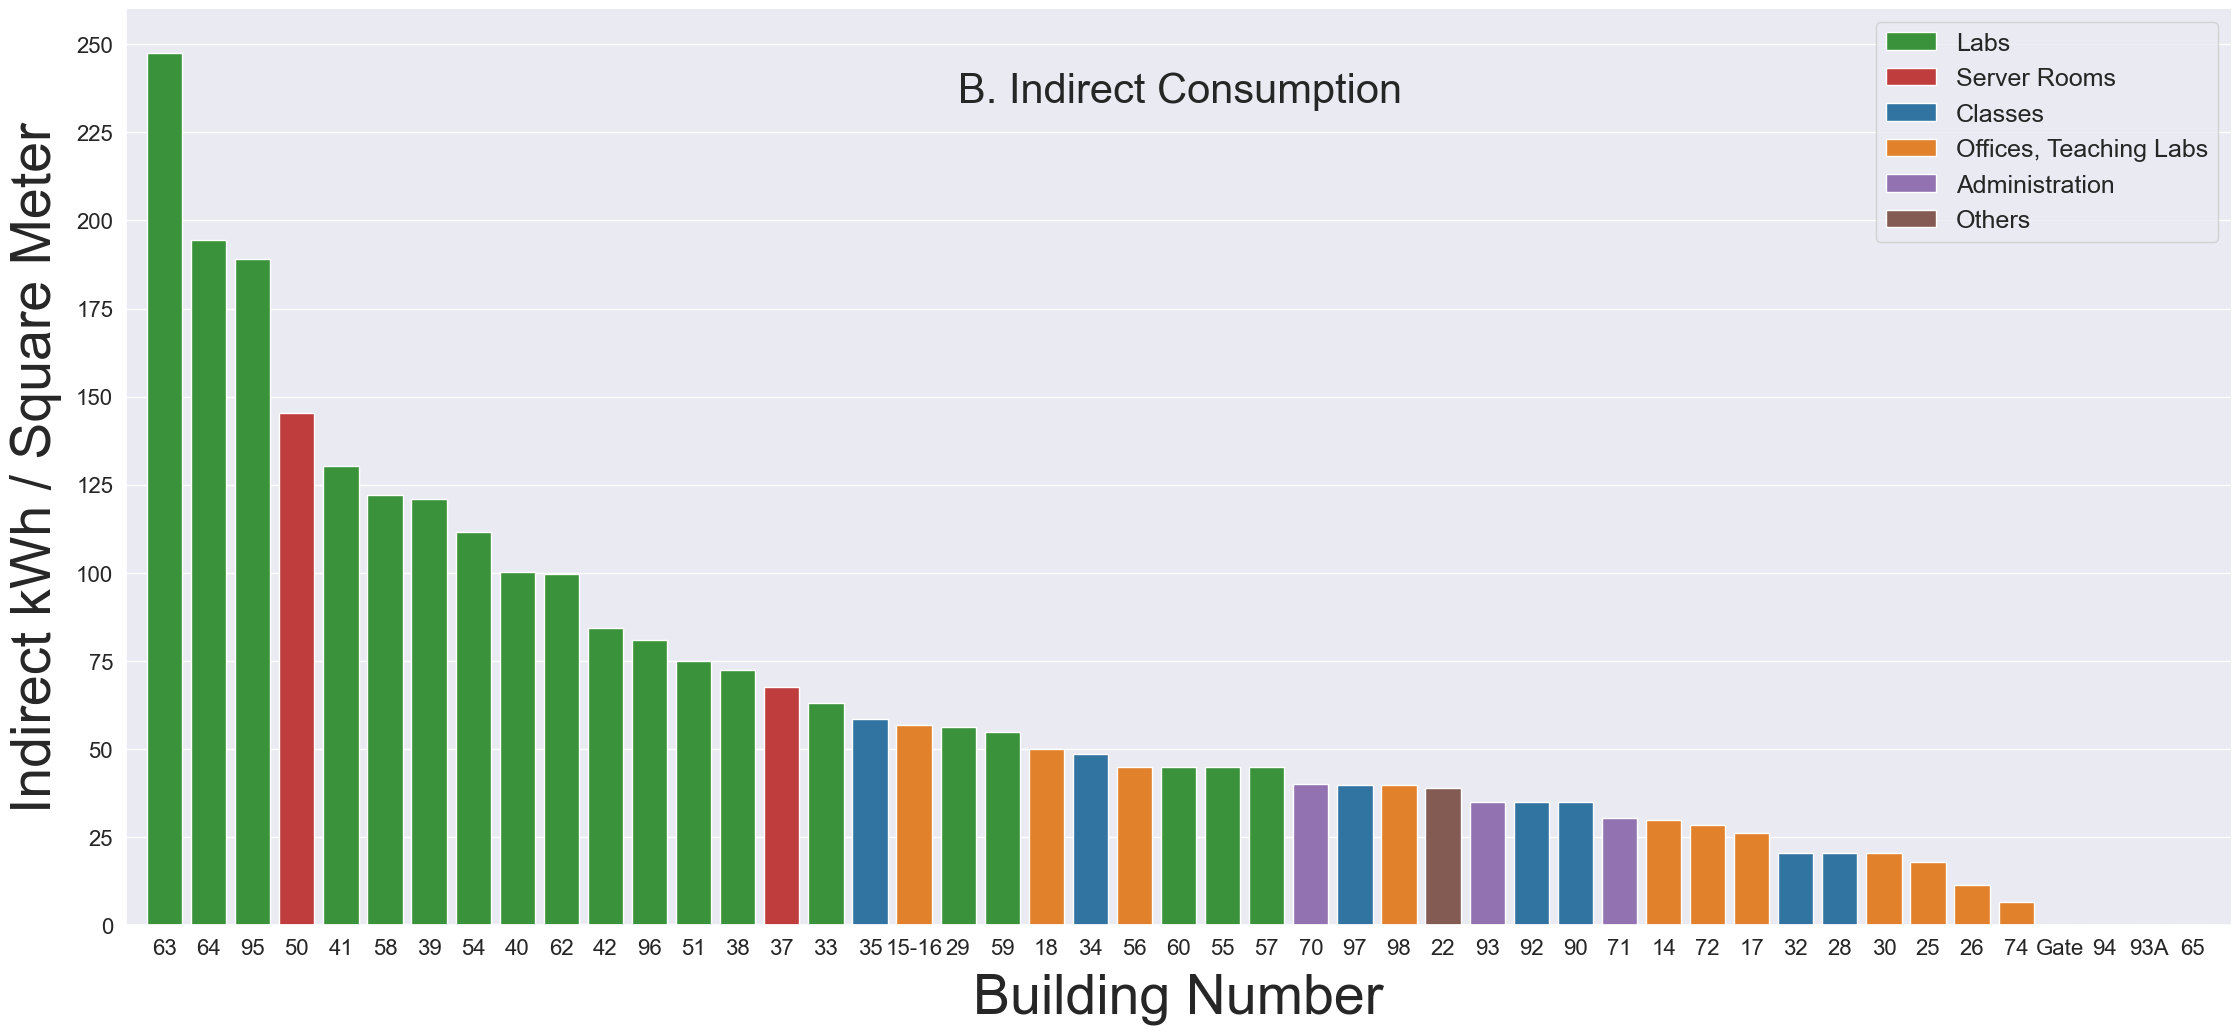

In [27]:
sns.catplot(data=buildings_yearly_consumption, x="building_number", y="yearly_indirect_consumption/area", hue="type", kind="bar", height=10, aspect=2.2, legend_out=False, dodge=False, palette=labels_palette);

plt.xticks(fontsize=16)
plt.yticks(np.arange(0, 275, step=25), fontsize=16)
plt.margins(x=0.01)

plt.xlabel("Building Number", fontsize=40, labelpad=10)
plt.ylabel("Indirect kWh / Square Meter", fontsize=40, labelpad=10)

# graph_title = 'Yearly Indirect Consumption for SM'
# plt.title(graph_title, fontsize=25, pad=10)

plt.legend(loc='upper right', fontsize=18)
plt.text(18, 233.5, 'B. Indirect Consumption', fontsize=30)

plt.savefig('Yearly Indirect Consumption for SM.png')
plt.show()